<h1>PAT 4</h1>
<h3>PMCA507P MACHINE LEARNING ; SLOT:L25+L26</h3>

<h2>REG.NO: 23MCA0072 </h2>
<h2>NAME: Madhumitha M</h2>

Implement the K-Means algorithm to cluster a given dataset into k groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
iris = load_iris()
X = iris.data  # Features
feature_names = iris.feature_names


In [2]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Implement K-Means Clustering
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        # Initialize clusters
        self.clusters = [[] for _ in range(self.k)]

        for _ in range(self.max_iters):
            # Assign data points to clusters
            self.clusters = [[] for _ in range(self.k)]
            for i, x in enumerate(X):
                distances = [euclidean_distance(x, centroid) for centroid in self.centroids]
                cluster_index = np.argmin(distances)
                self.clusters[cluster_index].append(i)

            # Update centroids
            prev_centroids = self.centroids.copy()
            for i, cluster in enumerate(self.clusters):
                if len(cluster) > 0:
                    cluster_mean = np.mean(X[cluster], axis=0)
                    self.centroids[i] = cluster_mean

            # Check for convergence
            if np.allclose(prev_centroids, self.centroids):
                break

    def predict(self, X):
        # Predict clusters for new data points
        predictions = []
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in self.centroids]
            cluster_index = np.argmin(distances)
            predictions.append(cluster_index)
        return predictions


In [4]:
# Perform K-Means clustering
kmeans = KMeans(k=3)
kmeans.fit(X_scaled)
cluster_labels = kmeans.predict(X_scaled)


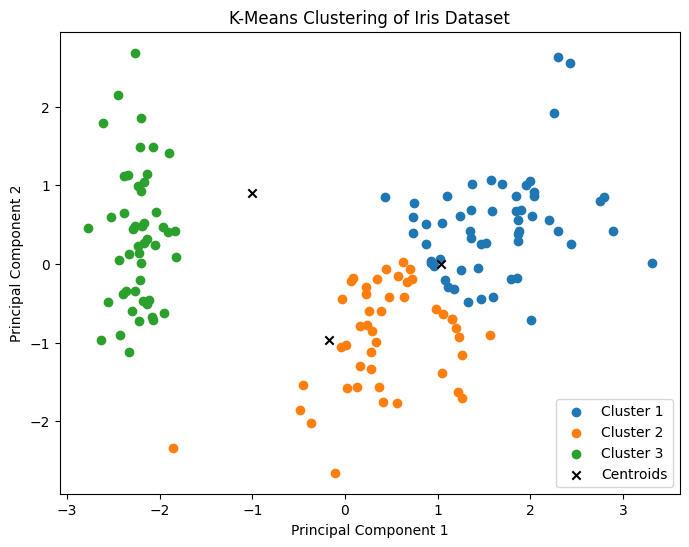

In [5]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[np.array(cluster_labels) == i, 0],
                X_pca[np.array(cluster_labels) == i, 1],
                label=f'Cluster {i+1}')

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()
